In [1]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 223 (delta 57), reused 0 (delta 0), pack-reused 120
Receiving objects: 100% (223/223), 20.20 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
! pip3 install mapclassify

In [3]:
# Import all necessary packages
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [97]:
df_2012 = pd.read_csv('DS-3001-Projects/Project 3/countydata/0002_ds191_20125_county_E.csv', encoding='latin-1')
df_2012.head()
df_2012 = df_2012.loc[(df_2012['STATE'] == "Virginia")]
df_2012 = df_2012.loc[1:,['QU1E001', 'QZTE001', 'QZ6E001', 'COUNTY']]
df_2012['Year'] = 2012  # address this choice in the paper
df_2012 = df_2012.rename(columns={"QU1E001": "Median Household Income", "QZTE001": "Median Gross Rent", "QZ6E001": "Median Home Value", "COUNTY": "County"})
df_2012['County'] = df_2012['County'].str.replace(' County', '')
df_2012['County'] = df_2012['County'].str.upper()
# 'QXSE001' (employment variable)
print(df_2012.head())
df_2012.shape


     Median Household Income Median Gross Rent Median Home Value     County  \
2821                   40780               741            153800   ACCOMACK   
2822                   67797              1080            332400  ALBEMARLE   
2823                   46133               546            117700  ALLEGHANY   
2824                   50596               823            201100     AMELIA   
2825                   45020               637            151800    AMHERST   

      Year  
2821  2012  
2822  2012  
2823  2012  
2824  2012  
2825  2012  


(134, 5)

In [98]:
df_2016 = pd.read_csv('DS-3001-Projects/Project 3/countydata/0002_ds225_20165_county_E.csv', encoding='latin-1')
df_2016.head()
df_2016 = df_2016.loc[(df_2016['STATE'] == "Virginia")]
df_2016 = df_2016.loc[1:,['AF49E001', 'AF89E001', 'AF9LE001', 'COUNTY']]
df_2016['Year'] = 2016
df_2016 = df_2016.rename(columns={"AF49E001": "Median Household Income", "AF89E001": "Median Gross Rent", "AF9LE001": "Median Home Value", "COUNTY": "County"})
df_2016['County'] = df_2016['County'].str.replace(' County', '')
df_2016['County'] = df_2016['County'].str.upper()
print(df_2016.head())
df_2016.shape

     Median Household Income Median Gross Rent Median Home Value     County  \
2821                   38503               749            151900   ACCOMACK   
2822                   70342              1156            317300  ALBEMARLE   
2823                   45538               636            111500  ALLEGHANY   
2824                   58269               689            171500     AMELIA   
2825                   47002               696            149400    AMHERST   

      Year  
2821  2016  
2822  2016  
2823  2016  
2824  2016  
2825  2016  


(133, 5)

In [99]:
df_2020 = pd.read_csv('DS-3001-Projects/Project 3/countydata/0002_ds249_20205_county_E.csv', encoding='latin-1')
df_2020.head()
df_2020 = df_2020.loc[(df_2020['STATE'] == "Virginia")]
df_2020 = df_2020.loc[1:,['AMR8E001', 'AMVZE001', 'AMWBE001', 'COUNTY']]
df_2020['Year'] = 2020
df_2020 = df_2020.rename(columns={"AMR8E001": "Median Household Income", "AMVZE001": "Median Gross Rent", "AMWBE001": "Median Home Value", "COUNTY": "County"})
df_2020['County'] = df_2020['County'].str.replace(' County', '')
df_2020['County'] = df_2020['County'].str.upper()
print(df_2020.head())
df_2020.shape

<ipython-input-99-84640e14325f>:1: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,

     Median Household Income Median Gross Rent Median Home Value     County  \
2822                 46178.0             825.0          173700.0   ACCOMACK   
2823                 84643.0            1349.0          376000.0  ALBEMARLE   
2824                 48513.0             616.0          121100.0  ALLEGHANY   
2825                 63918.0             846.0          215600.0     AMELIA   
2826                 57368.0             700.0          159900.0    AMHERST   

      Year  
2822  2020  
2823  2020  
2824  2020  
2825  2020  
2826  2020  


(133, 5)

In [103]:
frames = [df_2012, df_2016, df_2020]

df_comb = pd.concat(frames)
# print(df_comb.iloc[260:270]) # (used to check that all years were added)
df_comb.shape

(400, 5)

In [110]:
# Load data

# Before running this code chunk: manually download the VirginiaCounty_ClippedToShoreline.shp file from:
# https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about
# and upload it to the Google Colab cloned repo DS-3001-Projects/Project 3/shapefiles folder

gdf = gpd.read_file('DS-3001-Projects/Project 3/shapefiles/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
vdf = pd.read_csv('DS-3001-Projects/Project 3/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('DS-3001-Projects/Project 3/county_adjacencies.csv') # Load county adjacency data and population data

In [112]:
vdf.head()
vdf = vdf.rename(columns={"year": "Year", "county_name": "County"})
vdf.head()
# print(vdf.shape)
# vdf = vdf.dropna()
# print(vdf.shape)

,Unnamed: 0,Year,state,state_po,County,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [108]:
vdf = pd.merge(df_comb, vdf, on=['Year', 'County'], how='outer')
vdf.head()

,Median Household Income,Median Gross Rent,Median Home Value,County,Year,Median Household Income_x,Median Gross Rent_x,Median Home Value_x,Median Household Income_y,Median Gross Rent_y,...,state,state_po,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,40780,741,153800,ACCOMACK,2012,40780,741,153800,40780,741,...,VIRGINIA,VA,51001.0,US PRESIDENT,BARACK OBAMA,DEMOCRAT,7655.0,16051.0,20220315.0,TOTAL
1,40780,741,153800,ACCOMACK,2012,40780,741,153800,40780,741,...,VIRGINIA,VA,51001.0,US PRESIDENT,MITT ROMNEY,REPUBLICAN,8213.0,16051.0,20220315.0,TOTAL
2,40780,741,153800,ACCOMACK,2012,40780,741,153800,40780,741,...,VIRGINIA,VA,51001.0,US PRESIDENT,OTHER,OTHER,183.0,16051.0,20220315.0,TOTAL
3,67797,1080,332400,ALBEMARLE,2012,67797,1080,332400,67797,1080,...,VIRGINIA,VA,51003.0,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29757.0,53907.0,20220315.0,TOTAL
4,67797,1080,332400,ALBEMARLE,2012,67797,1080,332400,67797,1080,...,VIRGINIA,VA,51003.0,US PRESIDENT,MITT ROMNEY,REPUBLICAN,23297.0,53907.0,20220315.0,TOTAL


In [ ]:
cdf.head()
# print(cdf.shape)
# cdf = cdf.dropna()
# print(cdf.shape)

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

In [ ]:
# Clean data and merge into map dataframe

df20 = vdf.loc[ vdf['year']== 2020,:] # Only the 2020 data

Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

<Axes: >

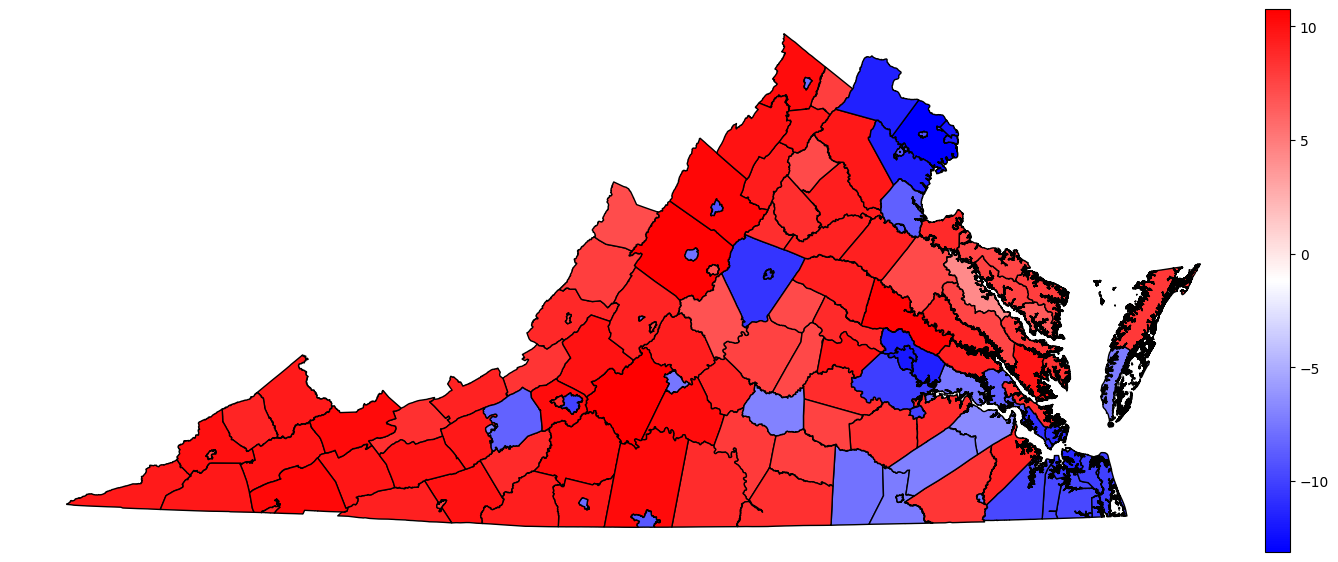

In [ ]:
# Difference

df['vote_diff'] = df['rep_votes_2020']-df['dem_votes_2020']
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')

<Axes: >

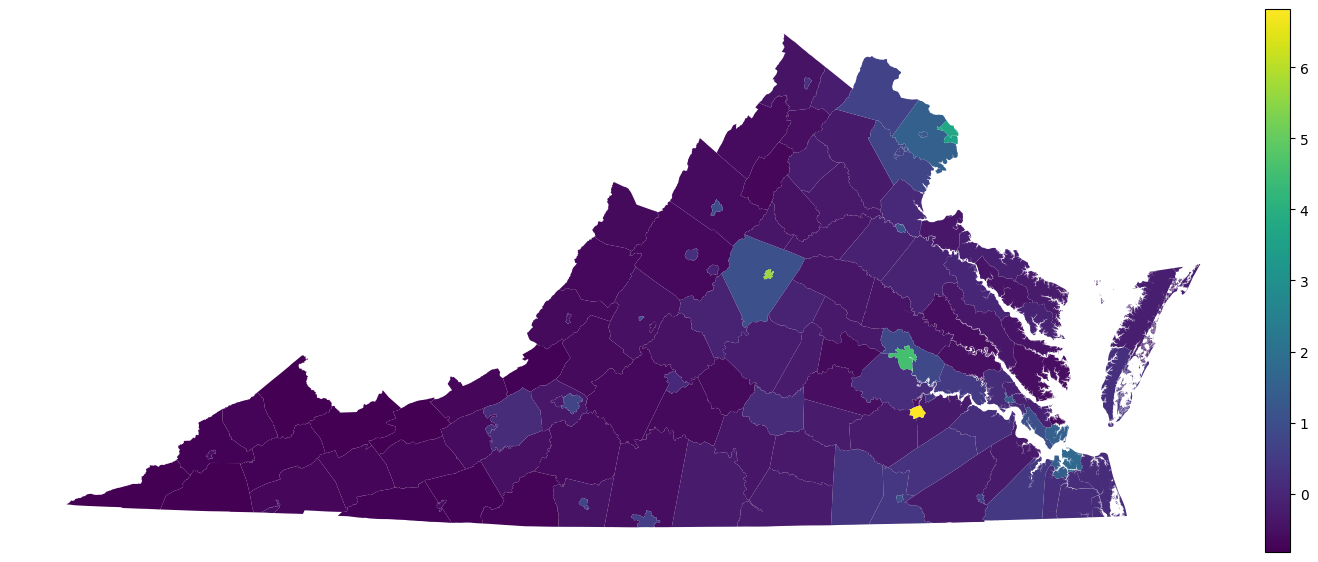

In [ ]:
# Percent Difference

df['pct_diff'] = -df['vote_diff']/df['rep_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='pct_diff',legend=True,cax=cax)

<Axes: >

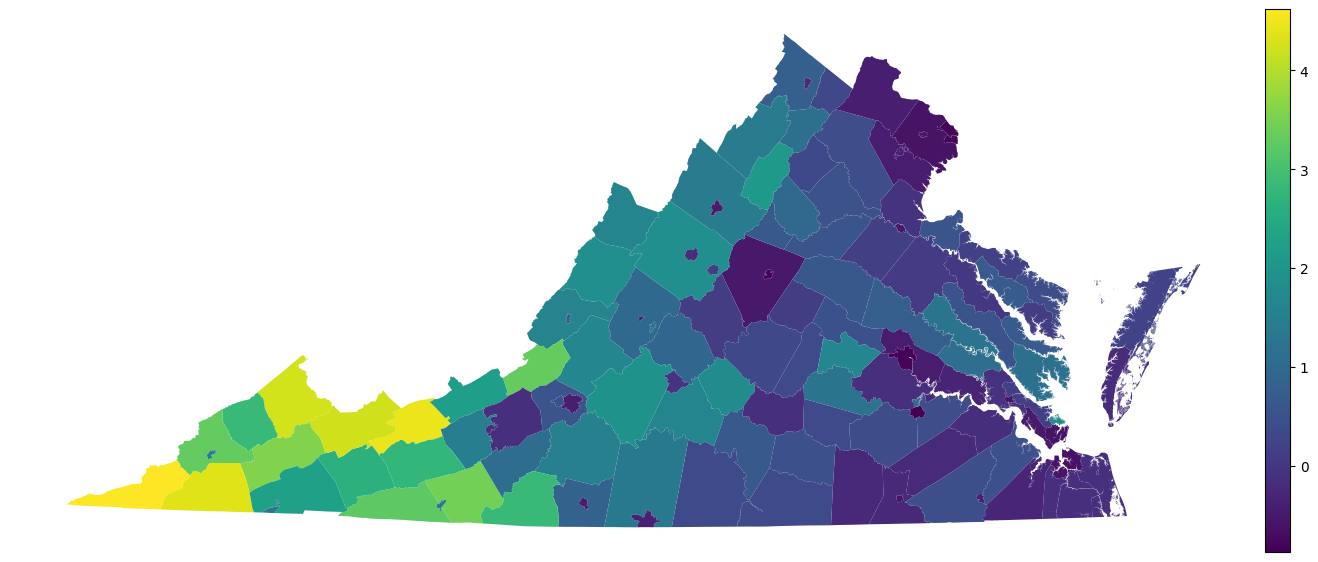

In [ ]:
# Percent Difference in Opposite Direction

df['pct_diff'] = df['vote_diff']/df['dem_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='pct_diff',legend=True,cax=cax)